# Notebook 8

## Solución numérica de EDO (parte 1)

#### Python 🐍

> Dr. Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$


En el presente notebook haremos la programación de algunos algoritmos para integración de Ecuaciones Diferenciales Ordinarias (EDO). Comenzaremos con métodos explícitos, es decir, aquellos en los que se hace un desarrollo de las derivadas de las ecuaciones involucradas. En subsecuentes notebook's (NB_10) se verán los llamados métodos implícitos que consisten únicamente en utilizar interpolaciones del sistema de EDO. Tomaremos como ejemplo ilustrativo la siguiente ecuación diferencial sobre el crecimiento o decrecimiento de una población:

$$
\frac{dP}{dt} = a P
$$

donde $P=P(t)$ representa la población y $a$ es un escalar que representa la tasa de crecimiento o decrecimiento, mismo que puede ser positivo o negativo. En el caso que nos interesa en este notebook $a>0$, y sabemos que la solución a la ecuación anterior es:

$$
P(t) = P_0 e^{at}
$$

donde $P_0$ es la población inicial. Comenzaremos con llamar a las bibliotecas que utilizaremos en este notebook:

In [1]:
from pylab import *

La EDO del párrafo anterior se representa por la siguiente función:

In [2]:
def modelo_exp(P,t,a=0.1):
    return a*P

En general una EDO, o sistema de EDO's, se representa por:

$$
\frac{d \vec x}{dt} = \vec g(\vec x, t)
$$
> Nota: Cuando $\vec g$ no depende explícitamente de $t$ decimos que el sistema es autónomo.

De acuerdo con las notas en la [página del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/), el método de Euler consiste en implementar el siguiente algoritmo:

$$
\vec x_{n+1} = \vec x_{n} + \delta \vec g(\vec x_{n},t_n)
$$

donde en la variable $\vec x$ se irán guardando los resultados $\delta = t_{n+1}-t_n$ es el paso de integración,  y entre más pequeño sea éste último mejor será la aproximación. El método de Euler queda implementado por la siguiente función

In [3]:
def Euler_1(edo,p_ini,t):
    sol = zeros((len(t),len(p_ini)))
    sol[0,:] = p_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        sol[i+1,:] = sol[i,:] + delta*edo(sol[i,:],t[i])
    return sol

A continuación vemos como encontrar la solución de la ecuación diferencial en `modelo_exp` y la comparamos con la solución analítica.

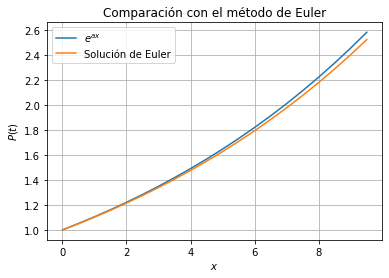

In [4]:
title("Comparación con el método de Euler"),xlabel("$x$"),ylabel("$P(t)$")
tiempo = arange(0,10,0.5)
plot(tiempo,exp(0.1*tiempo),label="$e^{ax}$")
solucion = Euler_1(modelo_exp,[1],tiempo)
plot(tiempo,solucion,label="Solución de Euler")
legend(),grid()
show()

Como se puede apreciar, conforme $t$ aumenta se va perdiendo precisión, misma que puede disminuir si hacemos el paso de integración más pequeño.

Veamos otro ejemplo con el siguiente sistema ecuaciones diferenciales:
$$
\frac{dx}{dt} = -y \\
\frac{dy}{dt} = x \\
$$

Este sistema es autónomo y queda representado por la siguiente función:

In [5]:
def circ_1(xy,t):
    dx = -xy[1]
    dy = xy[0]
    return array([dx,dy])

A continuación vemos la forma de obtener la solución numérica para la condición inicial $x(0) = 1$ y $y(0)=0$ en el intervalo $t \in [0,5\pi]$, y la comparamos con la solución analítica para $x(t) = \cos(x)$.

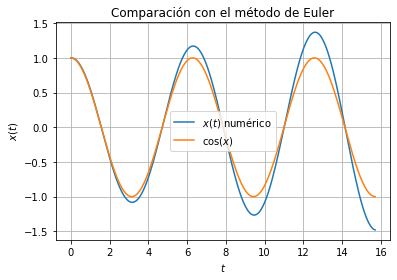

In [6]:
tiempo = arange(0,5*pi,0.05)
title("Comparación con el método de Euler"),xlabel("$t$"),ylabel("$x(t)$")
solucion = Euler_1(circ_1,[1,0],tiempo)
plot(tiempo,solucion[:,0],label="$x(t)$ numérico")
plot(tiempo,cos(tiempo),label="$\cos(x)$")
legend(),grid()
show()

A continuación exponemos el espacio fase $(x(t),y(t))$, en donde la solución analítica vendría dada en términos de círculos concéntricos de radio $\sqrt{x_0 ^2 + y_0 ^2}$ dado por la condición inicial.

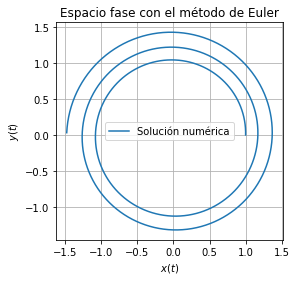

In [7]:
title("Espacio fase con el método de Euler"),xlabel("$x(t)$"),ylabel("$y(t)$")
plot(solucion[:,0],solucion[:,1],label="Solución numérica")
gca().set_aspect("equal")
grid(),legend()
show()

Como se puede ver, el método de Euler acarrea un error que se va haciendo más grande, sobre todo cuando se tienen funciones que cambian de curvatura como en el segundo ejemplo. Una manera de solucionar lo anterior es hacer una mejor aproximación de la solución utilizando la derivada del sistema de ecuaciones diferenciales utilizando la matriz Jacobiana, $\mathbb{J}$, y conectádola con el desarrollo de Taylor de la solución que queremos encontrar $\vec x (t)$. De acuerdo con las notas en la [página del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/), el método de Euler mejorado quedaría con la implementación del siguiente algoritmo:

$$
\vec x_{n+1} = \vec x_{n} + \delta \vec g(\vec x_{n},t_n) 
+\frac{1}{2} \delta ^2 \mathbb{J}^*(\vec x_{n},t_n)  \cdot \vec g ^*(\vec x_{n},t_n)
$$

donde $\mathbb{J}^* = \left(\mathbb{J} ,\frac{\partial \vec g}{\partial t} \right)$ y $\vec g^* = (\vec g,1)$. Cabe mencionar que la última columna de $\mathbb{J}^*$, y la última entrada de $\vec g^*$, se utilizan sólo en el caso de sistemas no autónomos como veremos en el siguiente notebook. En la siguiente celda vemos la implementación del método de Euler mejorado para un sistema no autónomo y con una matriz Jacobiana contante:

In [8]:
def Euler_mejorado(edo,p_ini,t,jacob):
    # Este solo tiene J y g sin dependencia temporal.
    sol = zeros((len(t),len(p_ini)))
    sol[0,:] = p_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        sol[i+1,:] = sol[i,:] + delta*edo(sol[i,:],t[i])
        #sol[i+1,:] += 0.5*(delta**2)*(jacob *edo(sol[i,:],t[i])) # ojo sistema autonomo
        sol[i+1,:] += 0.5*(delta**2)*dot(jacob,edo(sol[i,:],t[i])) # ojo sistema autonomo
    return sol

En el caso de la primera ecuación diferencial en este notebook, la matriz Jacobiana resulta un escalar dado por $a$ y la solución numérica comparada con el primer método de Euler es:

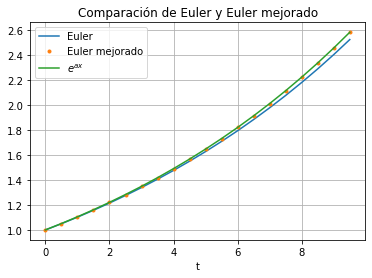

In [9]:
tiempo = arange(0,10,0.5)
solucion = Euler_1(modelo_exp,[1],tiempo)
solucion_mejor = Euler_mejorado(modelo_exp,[1],tiempo,0.1)
title("Comparación de Euler y Euler mejorado"),xlabel("t")
plot(tiempo,solucion,label="Euler")
plot(tiempo,solucion_mejor,".",label="Euler mejorado")
plot(tiempo,exp(0.1*tiempo),label="$e^{ax}$")
grid(),legend()
show()

Como se puede observar, el método de Euler mejorado es mucho mejor debido a que va prácticamente sobre la solución analítica.

En el caso del sistema de ecuaciones diferenciales que viene más arriba, la matriz Jacobiana resulta una matriz contante dada por:

$$\mathbb{J} = \left(\begin{array}{c c}
0 & -1 \\
1 & 0
\end{array} \right)
$$

De esta manera la solución numérica se obtiene de la siguiente manera:

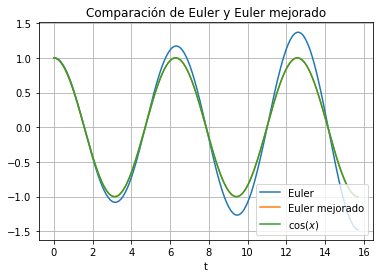

In [10]:
tiempo = arange(0,5*pi,0.05)
solucion = Euler_1(circ_1,[1,0],tiempo)
solucion_mejor = Euler_mejorado(circ_1,[1,0],tiempo,array([[0,-1],[1,0]]))
title("Comparación de Euler y Euler mejorado"),xlabel("t")
plot(tiempo,solucion[:,0],label="Euler")
plot(tiempo,solucion_mejor[:,0],label="Euler mejorado")
plot(tiempo,cos(tiempo),label="$\cos(x)$")
legend(),grid()
show()

Al igual que en el caso anterior, la solución del Euler mejorado va prácticamente sobre la solución analítica. En este caso el espacio fase se ve de la siguiente manera:

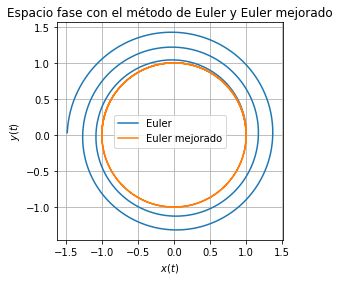

In [11]:
title("Espacio fase con el método de Euler y Euler mejorado"),xlabel("$x(t)$"),ylabel("$y(t)$")
plot(solucion[:,0],solucion[:,1],label="Euler")
plot(solucion_mejor[:,0],solucion_mejor[:,1],label="Euler mejorado")
legend(),grid(),gca().set_aspect("equal")
show()

Como se puede apreciar, el método de Euler mejorado ofrece mucho mejor precisión. En el siguiente notebook veremos ejemplos con un sistema de EDO's cuya matriz Jacobiana va cambiando conforme se va haciendo la integración y también revisaremos el caso de sistemas no autónomos.

[Regresar a la página del curso.](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo del proyecto DGAPA-PAPIME:

+ PE 103021 nueva versión durante el año 2022. Versión interactiva en Colab.
+ PE 112919 durante el año 2020. Idea original.